In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid',color_codes =True)
sns.set(font_scale=1)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestRegressor

In [2]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import os

In [3]:
train_df = pd.read_csv('train.csv' , index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [4]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

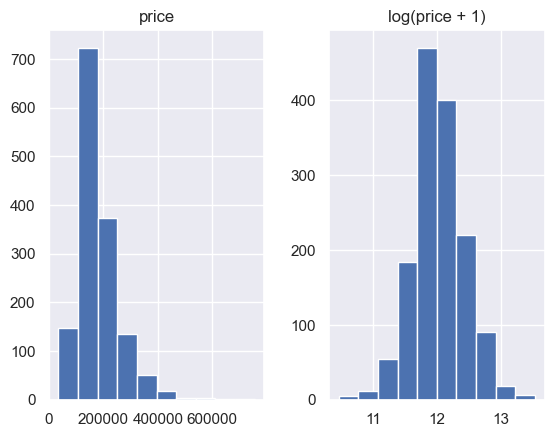

In [5]:
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [6]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [7]:
print(f'train_df shape:{train_df.shape}, and test_df shape:{test_df.shape}')
all_df = pd.concat([train_df,test_df],axis=0)
print(f'after concatenation: all_df shape:{all_df.shape}')

train_df shape:(1460, 79), and test_df shape:(1459, 79)
after concatenation: all_df shape:(2919, 79)


In [8]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [9]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
plt.figure(figsize=(8,8))
plt.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'],color='yellowgreen',edgecolor ='white')

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

KeyError: 'SalePrice'

<Figure size 800x800 with 0 Axes>

In [ ]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

In [ ]:
X_train = all_dummy_df.values
X_test = all_dummy_df.values

In [ ]:
import matplotlib

alphas = np.logspace(-3,2,50)
test_scores =[]
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train, y_train, cv=10,scoring='neg mean squared error'))
    test_scores.append(np.mean(test_score))

In [ ]:
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error")

In [ ]:
from xgboost import XGBRegressor

In [ ]:
params= [1,2,3,4,5,6]
test_scores = []
for param in params :
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf,X_train, y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))